# Job Recommendation Using Knowledge Graph

In [98]:
import networkx as nx
import pandas as pd
from IPython.display import display


In [99]:
job_description_dataset = pd.read_json("career_builder_jobs_10501.json")
resume_dataset=pd.read_json("resumes.json")

In [100]:
for resumeData in resume_dataset.values[:1] : # first two resumes
    print(resumeData[0]['id']) #id
    print(resumeData[0]['careerjunction_za_skills']) # skills
    print(resumeData[0]['careerjunction_za_courses']) # Degree 
    print(f" Experience {len(resumeData[0]['careerjunction_za_historical_jobtitles'])}") # Experience


1
['Microbiology', 'microsoft powerpoint', 'microsoft office', 'microsoft excel', 'microsoft project management', 'Microsoft word', 'Outlook', 'Internet explorer', 'Marketing/Sales', 'Quality Control', 'Quality Assurance', 'Research and development', 'Problem solving']
['Btech: Food Technology', 'National Diploma: Food Technology', 'Senior Certificate']
 Experience 5


In [101]:
for jobData in job_description_dataset[:1].values:  # first two job description
    print(jobData[17])  # Id
    print(jobData[0])  # Salary
    print(jobData[6])  # Skills
    print(jobData[2])  # Degree
    numbers = [int(word) for word in jobData[14].split() if word.isdigit()]
    numbers.append(0)
    experience = max(numbers) 
    print(experience) # Experience
    print(jobData[20])  # Job Type


2b387592-8148-5720-a661-a2730061d14c
$17.23 - $22.00 / hour
Emergency Handling
Bachelor's Degree
2
FULL_TIME


In [108]:
nodes = [n for n in resume_dataset.values][:2]
nodes_id=[n[0]['id'] for n in nodes]
nodes_id


[1, 2]

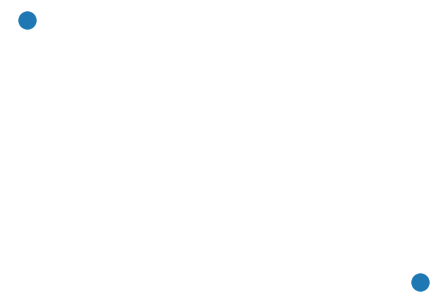

In [109]:
G = nx.Graph()
G.add_nodes_from(nodes_id)
nx.draw(G)